<a href="https://colab.research.google.com/github/SAIPRIYADODDA/NNDL/blob/main/ASSGNMENT8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sb
from scipy import stats

In [3]:
df = pd.read_excel("/content/drive/MyDrive/pressure_weight.xls")
df.head()


*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [4]:
k= np.abs(stats.zscore(df))
print(k)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


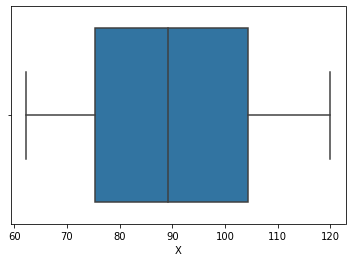

In [7]:
sb.boxplot(x=df['X'])

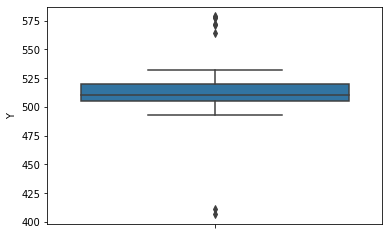

In [8]:
sb.boxplot(y=df['Y'])

In [9]:
p_df = df[(k < 3).all(axis=1)]
p_df.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [10]:
for i in df:
    q = df[i].quantile(0.99)
    df[df[i] < q]
    q_low = df[i].quantile(0.01)
    q_hi  = df[i].quantile(0.99)

    df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
df_filtered.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
4,98.5,572.4
5,112.0,411.2


In [11]:
data = df_filtered
print(len(data))
print(len(df_filtered))
if(len(data) == len(df_filtered)):
    print('No outliners')

28
28
No outliners


In [12]:
new_data=df.copy()
new_data = (new_data - new_data.min())/(new_data.max() - new_data.min())
new_data.head()

,X,Y
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


In [13]:
train_data,test_data = train_test_split(new_data,train_size=0.9)
print(len(train_data))
train_data.head()

27


,X,Y
11,0.927336,0.573008
29,0.619377,0.670739
8,0.775087,0.000000
5,0.861592,0.026178
1,0.209343,0.990692


In [15]:
x_val=np.array(train_data['X'])
y_val=np.array(train_data['Y'])

In [16]:
from sympy import Symbol, Derivative, symbols
m= Symbol('m')
c= Symbol('c')
function = '0.5*(y-m*x-c)**2'
partialderiv= Derivative(function, m)
dfm = partialderiv.doit()
partialderiv= Derivative(function, c)
dfc = partialderiv.doit()

print(f'first order derivatives of given function are de/dm = {dfm} ,de/dc = {dfc}')
err = []
#step 1 initialise values 
m1 = -1.0 
c1 = 1.0  #variable x, y
epoches=100
learning_rate = 0.1  #learning rate
for i in range(0,epoches):
    dfmv1 = 0
    dfcv1 = 0
    er = 0
    for j in range(0,len(x_val)):
        er +=  ((y_val[j] - (m1 * x_val[j]) - c1))**2
        #step 2 substitute x ,y in first order derivatives df/dx, df/dy
        m = symbols('m')
        c = symbols('c')
        x = symbols('x')
        y = symbols('y')
        dfmv = dfm.subs(m, m1) 
        dfmv = dfmv.subs(c, c1) 
        dfmv = dfmv.subs(x, x_val[j]) 
        dfmv = dfmv.subs(y, y_val[j]) 
        dfmv = round(dfmv,2)
        dfcv = dfc.subs(c, c1) 
        dfcv = dfcv.subs(m, m1) 
        dfcv = dfcv.subs(x, x_val[j]) 
        dfcv = dfcv.subs(y, y_val[j]) 
        dfcv = round(dfcv,2)
        dfmv1 += dfmv
        dfcv1 += dfcv
    dfmv1 = dfmv1/len(x_val)
    dfcv1 = dfcv1/len(x_val)
    
    dfmv1 = round(dfmv1,2)
    dfcv1 = round(dfcv1,2)
    #step3 find change in x , y
    dm = (-1.0)*learning_rate*dfmv1
    dc = (-1.0)*learning_rate*dfcv1
    #step4 update variable 
    m1 = m1 + dm
    m1 = round(m1, 2) 
    c1 = c1 + dc
    c1 = round(c1, 2)
    er = (1/(2*len(train_data['X'])))*(er)
    err.append(er)
    #step5 increment iterations 
    #step6 break loop if iterations exceed no of epoches
#step7 print variable x1, y1
print(m1, c1)
print(f'minimum value obtained at m = {m1} ,c ={c1} for given function')


first order derivatives of given function are de/dm = -1.0*x*(-c - m*x + y) ,de/dc = 1.0*c + 1.0*m*x - 1.0*y
-0.86 1.06
minimum value obtained at m = -0.86 ,c =1.06 for given function


In [17]:
from sklearn.metrics import mean_squared_error

train_data_pred =  m1*train_data['X'] + c1

train_mse = mean_squared_error(train_data['Y'],train_data_pred)
train_mse

0.08677904657994295

Text(0.5, 1.0, 'predicted data vs actual data')

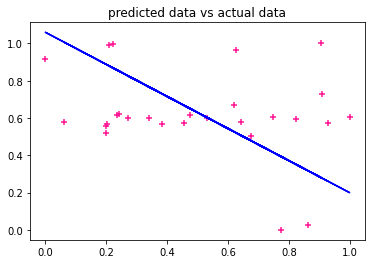

In [18]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),color='blue')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),marker='+',color='deeppink')
plt.title('predicted data vs actual data')

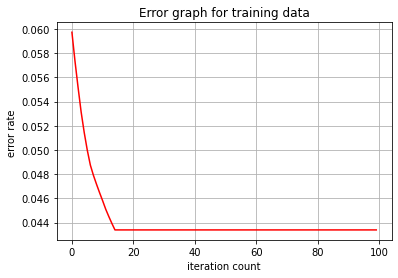

In [22]:
iters = np.arange(epoches)
plt.plot(iters,err,color='red')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error rate ")
plt.grid()

In [23]:
test_data_pred = m1 *test_data['X'] + c1
test_mse = mean_squared_error(test_data['Y'],test_data_pred)
test_mse

0.08806710479282893

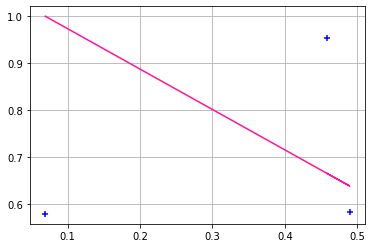

In [24]:
plt.scatter(test_data['X'],test_data['Y'],marker='+',color='blue')
plt.plot(test_data['X'],test_data_pred,color='deeppink')
plt.grid()

In [25]:
x_min = df['X'].min()
x_max = df['X'].max()
y_min = df['Y'].min()
y_max = df['Y'].max()

In [26]:
x =x1 = float(input("enter pressure of liquid nitrogen value :"))
x = (x - x_min)/(x_max - x_min)
y = m1*x + c1
y = y*(y_max - y_min) + y_min
print(f"weight of liquid nitrogen based on its pressure {x1} is : {y}")

enter pressure of liquid nitrogen value :55
weight of liquid nitrogen based on its pressure 55.0 is : 607.346908284224
